In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('dt_analysis - cv.csv')
df.head()

,tree,dataset,language,splitting_criterion,rows,columns,k-fold,accuracy,mcc,generation_time
0,d1,heart failure prediction,r,gini,299,13,20,81.17,0.560,0.623
1,d2,heart failure prediction,r,info gain,299,13,20,82.05,0.584,0.633
2,d3,heart failure prediction,r,gain ratio,299,13,20,81.94,0.579,0.076
3,d4,heart failure prediction,python,gini,299,13,20,78.68,0.163,0.086
4,d5,heart failure prediction,python,info gain,299,13,20,76.63,0.111,0.088


In [17]:
df_DTP = df[df['language'].str.contains(r'neo4j')]
df_DTP

,tree,dataset,language,splitting_criterion,rows,columns,k-fold,accuracy,mcc,generation_time
8,d9,heart failure prediction,neo4j_csv,gini,299,13,20,76.29,0.450,0.108
9,d10,heart failure prediction,neo4j_csv,info gain,299,13,20,76.85,0.472,0.054
10,d11,heart failure prediction,neo4j_csv,gain ratio,299,13,20,78.28,0.462,0.055
11,d12,heart failure prediction,neo4j_db,gini,299,13,20,75.93,0.420,0.095
12,d13,heart failure prediction,neo4j_db,info gain,299,13,20,76.55,0.401,0.052
13,d14,heart failure prediction,neo4j_db,gain ratio,299,13,20,76.45,0.412,0.057
22,d23,metaprotein,neo4j_csv,gini,48,50,10,75.83,0.694,0.027
23,d24,metaprotein,neo4j_csv,info gain,48,50,10,75.83,0.696,0.013
24,d25,metaprotein,neo4j_csv,gain ratio,48,50,10,78.33,0.661,0.013
25,d26,metaprotein,neo4j_db,gini,48,50,10,72.50,0.590,0.034


In [3]:
df_diabetes = pd.read_csv('dt_analysis - diabetes.csv')
df_diabetes.head()

,tree,dataset,language,splitting_criterion,k-fold,accuracy,precision,mcc,gen_time
0,d1,Diabetes,r,gini,5,84.76,0.019,0.210,52.57
1,d2,Diabetes,r,info gain,5,84.67,0.020,0.210,55.50
2,d3,Diabetes,r,gain ratio,5,83.96,0.034,0.230,98.40
3,d4,Diabetes,python,gini,5,76.63,0.057,0.179,4.45
4,d5,Diabetes,python,info gain,5,77.02,0.057,0.182,4.79


In [15]:
df_diabetes_DTP = df_diabetes[df_diabetes['language'].str.contains(r'neo4j')]
df_diabetes_DTP

,tree,dataset,language,splitting_criterion,k-fold,accuracy,precision,mcc,gen_time
8,d9,Diabetes,neo4j (csv),gini,5,77.76,0.051,0.1650,26.122
9,d10,Diabetes,neo4j (csv),info gain,5,77.63,0.050,0.1610,14.846
10,d11,Diabetes,neo4j (csv),gain ratio,5,81.07,0.034,0.1607,31.170
11,d12,Diabetes,neo4j (nodes),gini,5,77.76,0.051,0.1650,26.880
12,d13,Diabetes,neo4j (nodes),info gain,5,77.62,0.051,0.1610,15.400
13,d14,Diabetes,neo4j (nodes),gain ratio,5,81.07,0.034,0.1607,28.980


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tree                 14 non-null     object 
 1   dataset              14 non-null     object 
 2   language             14 non-null     object 
 3   splitting_criterion  14 non-null     object 
 4   k-fold               14 non-null     int64  
 5   accuracy             14 non-null     float64
 6   precision            14 non-null     float64
 7   mcc                  14 non-null     float64
 8   gen_time             14 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ KB


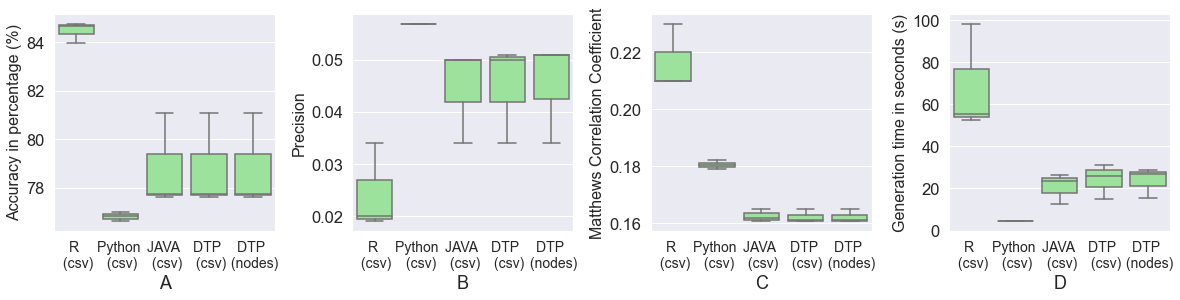

In [6]:
# Plots for Diabetes dataset
fig, axes = plt.subplots(1, 4, figsize = (20,4), sharey = False)

sns.set(font_scale = 1.5)

box1 = sns.boxplot(ax = axes[0], data=df_diabetes, x="language", y="accuracy", color = "lightgreen")
box2 = sns.boxplot(ax = axes[1], data=df_diabetes, x="language", y="precision", color = "lightgreen")
box3 = sns.boxplot(ax = axes[2], data=df_diabetes, x="language", y="mcc", color = "lightgreen")
box4 = sns.boxplot(ax = axes[3], data=df_diabetes, x="language", y="gen_time", color = "lightgreen")


box1.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'DTP \n (csv)', 'DTP \n (nodes)'])
box2.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'DTP \n (csv)', 'DTP \n (nodes)'])
box3.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'DTP \n (csv)', 'DTP \n (nodes)'])
box4.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'DTP \n (csv)', 'DTP \n (nodes)'])

box1.set(xlabel="A")
box2.set(xlabel="B")
box3.set(xlabel="C")
box4.set(xlabel="D")

box1.set_ylabel('Accuracy in percentage (%)', fontsize = 16)
box2.set_ylabel('Precision', fontsize = 16)
box3.set_ylabel('Matthews Correlation Coefficient', fontsize = 16)
box4.set_ylabel('Generation time in seconds (s)', fontsize = 16)

box1.set_xticklabels(box1.get_xticklabels(), size = 14)
box2.set_xticklabels(box2.get_xticklabels(), size = 14)
box3.set_xticklabels(box3.get_xticklabels(), size = 14)
box4.set_xticklabels(box4.get_xticklabels(), size = 14)

fig.subplots_adjust(wspace=0.35)

plt.savefig('diabtes_eval.pdf', 
          dpi=300, bbox_inches='tight')

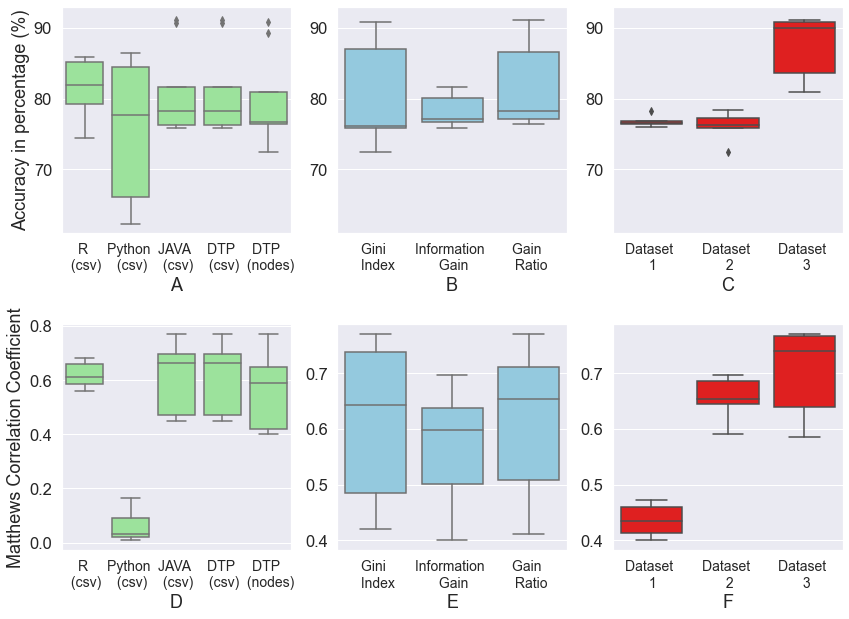

In [19]:
# Accuracy and Mathews' Correlation Coefficient
fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharey=False)

sns.set(font_scale = 1.5)

box1 = sns.boxplot(ax = axes[0,0], data=df, x="language", y="accuracy", color = "lightgreen")
box2 = sns.boxplot(ax = axes[0,1], data=df_DTP, x="splitting_criterion", y="accuracy", color = "skyblue")
box3 = sns.boxplot(ax = axes[0,2], data=df_DTP, x="dataset", y="accuracy", color = "red")
box4 = sns.boxplot(ax = axes[1,0], data=df, x="language", y="mcc", color = "lightgreen")
box5 = sns.boxplot(ax = axes[1,1], data=df_DTP, x="splitting_criterion", y="mcc", color = "skyblue")
box6 = sns.boxplot(ax = axes[1,2], data=df_DTP, x="dataset", y="mcc", color = "red")

box1.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'DTP \n (csv)', 'DTP \n (nodes)'])
box2.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])
box3.set_xticklabels(['Dataset \n 1','Dataset \n 2','Dataset \n 3'])
box4.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'DTP \n (csv)', 'DTP \n (nodes)'])
box5.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])
box6.set_xticklabels(['Dataset \n 1','Dataset \n 2','Dataset \n 3'])

box1.set(xlabel="A")
box2.set(xlabel="B")
box3.set(xlabel="C")
box4.set(xlabel="D")
box5.set(xlabel="E")
box6.set(xlabel="F")

box1.set_ylabel('Accuracy in percentage (%)', fontsize = 18)
box2.set(ylabel=None)
box3.set(ylabel=None)
box4.set_ylabel('Matthews Correlation Coefficient', fontsize = 18)
box5.set(ylabel=None)
box6.set(ylabel=None)

box1.set_xticklabels(box1.get_xticklabels(), size = 14)
box2.set_xticklabels(box2.get_xticklabels(), size = 14)
box3.set_xticklabels(box3.get_xticklabels(), size = 14)
box4.set_xticklabels(box1.get_xticklabels(), size = 14)
box5.set_xticklabels(box2.get_xticklabels(), size = 14)
box6.set_xticklabels(box3.get_xticklabels(), size = 14)

box1.set(ylim=(61, 93))
box2.set(ylim=(61, 93))
box3.set(ylim=(61, 93))

fig.subplots_adjust(wspace=0.2, hspace=0.4)


plt.savefig('accuracy_percentage.pdf', 
          dpi=300, bbox_inches='tight')

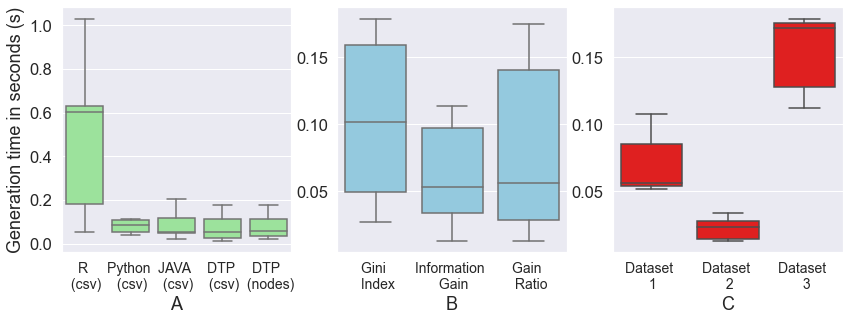

In [20]:
# Generation time
fig, axes = plt.subplots(1, 3, figsize=(14, 4.5), sharey=False)

sns.set(font_scale = 1.5)

box4 = sns.boxplot(ax = axes[0], data=df, x="language", y="generation_time", color = "lightgreen")
box5 = sns.boxplot(ax = axes[1], data=df_DTP, x="splitting_criterion", y="generation_time", color = "skyblue")
box6 = sns.boxplot(ax = axes[2], data=df_DTP, x="dataset", y="generation_time", color = "red")

box4.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'DTP \n (csv)', 'DTP \n (nodes)'])
box5.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])
box6.set_xticklabels(['Dataset \n 1','Dataset \n 2','Dataset \n 3'])

box4.set(xlabel="A")
box5.set(xlabel="B")
box6.set(xlabel="C")

box4.set_ylabel('Generation time in seconds (s)', fontsize = 18)
box5.set(ylabel=None)
box6.set(ylabel=None)


box4.set_xticklabels(box4.get_xticklabels(), size = 14)
box5.set_xticklabels(box5.get_xticklabels(), size = 14)
box6.set_xticklabels(box6.get_xticklabels(), size = 14)

fig.subplots_adjust(wspace=0.2)

plt.savefig('generation_time.pdf', 
          dpi=300, bbox_inches='tight')